Loading dataset to begin exploratory data analysis

In [ ]:
# Importing required libraries  
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline
data = pd.read_csv('Live.csv')

data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


A glimpse from the first five row of dataset being used indicate high presence of faulty values which
indicates dataset is not good enough. 
Lets rectify that

In [209]:
# first confirm sum of null rows for each column
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [210]:

# code below drops all values in list nested within drop method on its column(axis)
data.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

In [211]:
#lets view the loaded dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [212]:
# view statistical summary of the dataset

data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Above it can be observed there are three missing columns labelled as object, this development suggest categorical data. lets explore 

In [184]:
# looking back at the table at the top we can observe the objects are file objects, datetime
# and gen ids.
# lets look up repertition values or how unique they are.

print(len(data['status_id'].unique())) 
print(len(data['status_type'].unique()))
print(len(data['status_published'].unique()))

6997
4
6913


Of all three columns viewed the number of unique values of status_id and status_published do not correspond with the number of rows in database and indicated left over values which are simply repetitions so no much use for these columns therefore will be dropped

In [213]:
# dropping columns with assumed categorical data

data.drop(['status_id','status_published'], axis=1, inplace=True)

In [214]:
# lets reviw dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [215]:
# lets see what in the status_type

data['status_type'].unique()


array(['video', 'photo', 'link', 'status'], dtype=object)

Data in status column will now be encoded to numeric representation of categorical data and excluded from numeric features that will be scaled this is to ensure the model discover patterns and establish relationship on its own.

In [232]:

# Encode 'status_type' and scale numeric features, then drop the column status_type
# before scaling the dataset
status = data['status_type']
print(status.unique())
label_encoder = LabelEncoder()
data['status_type'] = label_encoder.fit_transform(data['status_type'])
scaled_features = StandardScaler().fit_transform(data.drop('status_type', axis=1))

# dropping status_type column from data before creating new dataset 
features = pd.DataFrame(scaled_features, columns=data.drop('status_type', axis=1).columns)

# now to observe new dataset(features)
print(features)

[3 1 0 2]
      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          0.646104      0.323350    1.686879   0.482727   1.983266  0.196196   
1         -0.173192     -0.252206   -0.304144  -0.144720  -0.318454 -0.147879   
2         -0.006738      0.013089    0.129017  -0.024571   0.206938 -0.033187   
3         -0.257499     -0.252206   -0.304144  -0.231495  -0.318454 -0.147879   
4         -0.037003     -0.252206   -0.304144  -0.024571  -0.093286 -0.147879   
...             ...           ...         ...        ...        ...       ...   
7045      -0.305057     -0.252206   -0.304144  -0.280445  -0.318454 -0.147879   
7046      -0.462863     -0.252206   -0.304144  -0.447319  -0.293436 -0.147879   
7047      -0.493128     -0.252206   -0.304144  -0.476244  -0.293436 -0.147879   
7048       0.261316     -0.238717   -0.136959   0.298053  -0.268417 -0.147879   
7049      -0.460702     -0.252206   -0.304144  -0.440644  -0.318454 -0.147879   

      num_hahas  


Variance Ratio for PCA Components: [0.3832663  0.19289793]


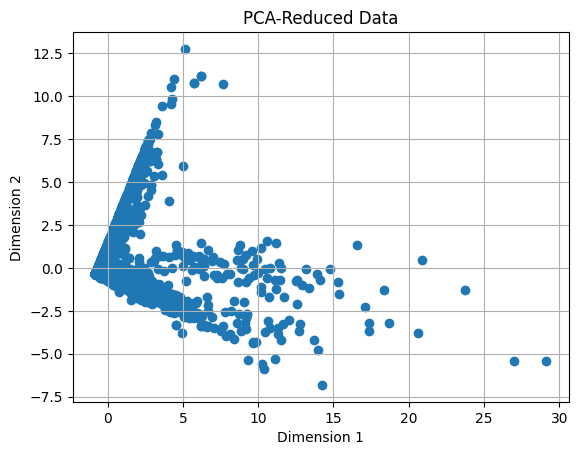

In [218]:
# here a function to define principal component analysis (a dimensionality reducing technique)
def apply_pca(features, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    print("\nVariance Ratio for PCA Components:", pca.explained_variance_ratio_)
    return reduced_features

features_2d = apply_pca(features)

# Visualize PCA-reduced data
plt.scatter(features_2d[:, 0], features_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('PCA-Reduced Data')
plt.grid(True)
plt.show()

From the plot above its a bit difficult to tell the clusters vividly so we will create clustering models using *The Elbow Method*

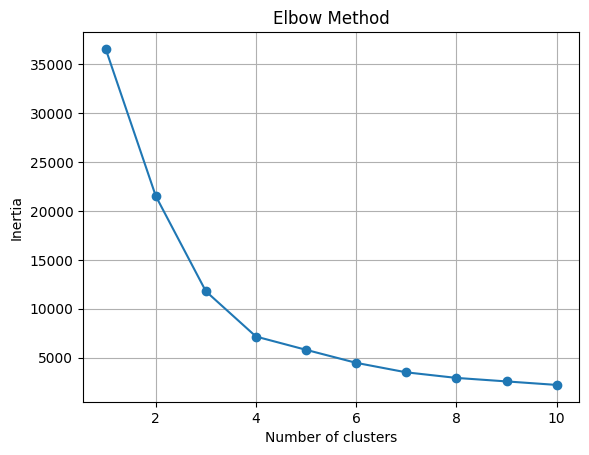

In [ ]:
def elbow_method(data, max_clusters=10):
    """Plots number of clusters againts saved inertia values saved"""
    inertia_values = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()

elbow_method(features_2d)

The plot shows a large reduction in inertia as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters, slightly noticeable reduction from three to four. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three - four clusters. This is a good indication that there are three to four reasonably well separated clusters of data points.

In [224]:
# Performing K-means clustering with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, n_init=100, random_state=42)
km_clusters = kmeans.fit_predict(features_2d)
km_clusters

array([2, 1, 1, ..., 1, 1, 1])

Now to view the assigned clusters on a two dimensional plot

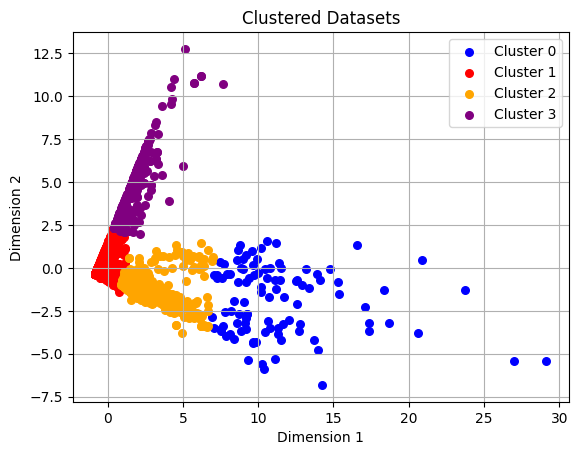

In [ ]:

# Visualize clusters
def plot_clusters(data, clusters, n_clusters):
    """Plots clusters with unique colors."""
    colors = ['blue', 'red', 'orange', 'purple']
    for cluster in range(n_clusters):
        cluster_points = data[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    color=colors[cluster], marker="o", s=30, label=f'Cluster {cluster}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Clustered Datasets')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(features_2d, km_clusters, optimal_clusters)


In [235]:
# Evaluate clustering with silhouette score
silhouette = silhouette_score(features_2d, km_clusters)
print("\nSilhouette Score:", silhouette)


Silhouette Score: 0.7695308655462485


A silhoute score of 0.77 indicates well-seperated clusters and cohesive clusters overall an Excellent clustering

*Cheers!!!!*